In [1]:
#load libraries and data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import sklearn.datasets as datasets
#answer 
#Q.1 Why does it makes sense to discretize columns for this problem?
#Q.2 What might be the issues (if any) if we DID NOT discretize the columns

In [2]:
#load data

df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")

In [3]:
#look at data 
df.head(5)

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [5]:
#Dataframe's shape

print(df.shape)

(48842, 11)


In [6]:
#find missing values
df.isnull().sum()
#no missing values in bins

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [7]:
#descriptive statistics
df.hours_per_week_bin.describe()

count        48842
unique           5
top       b. 31-40
freq         26639
Name: hours_per_week_bin, dtype: object

In [8]:
#Calculating number of numerical variables

int_cols = df.select_dtypes(include=['int64','float64'])

int_cols_count = int_cols.shape[1]

print(int_cols_count)

1


In [9]:
#Calculating number of categorical variables

cat_cols = df.select_dtypes(include='object')

cat_cols_count = cat_cols.shape[1]

print(cat_cols_count)

10


In [10]:
#cardinality for each of the bins
df.nunique()

hours_per_week_bin    5
occupation_bin        5
msr_bin               3
capital_gl_bin        3
race_sex_bin          3
education_num_bin     5
education_bin         5
workclass_bin         2
age_bin               5
flag                  2
y                     2
dtype: int64

In [11]:
#remove strings from bins and make a copy
df1 = df.copy()
df1.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [12]:
#use str.split to get rid of the letters before values
df1['hours_per_week_bin'] = df1['hours_per_week_bin'].astype(str).str.split(r".").str[1]
df1['occupation_bin'] = df1['occupation_bin'].astype(str).str.split(r".").str[1]
df1['msr_bin'] = df1['msr_bin'].astype(str).str.split(r".").str[1]
df1['capital_gl_bin'] = df1['capital_gl_bin'].astype(str).str.split(r".").str[1]
df1['race_sex_bin'] = df1['race_sex_bin'].astype(str).str.split(r".").str[1]
df1['education_num_bin'] = df1['education_num_bin'].astype(str).str.split(r".").str[1]
df1['education_bin'] = df1['education_bin'].astype(str).str.split(r".").str[1]
df1['workclass_bin'] = df1['workclass_bin'].astype(str).str.split(r".").str[1]
df1['age_bin']= df1['age_bin'].astype(str).str.split(r".").str[1]

In [13]:
#print copy
print(df1)

      hours_per_week_bin occupation_bin msr_bin capital_gl_bin race_sex_bin  \
0                  31-40      Mid - Low     Mid            > 0         High   
1                   0-30           High    High            = 0         High   
2                  31-40            Low     Mid            = 0         High   
3                  31-40            Low    High            = 0          Mid   
4                  31-40           High    High            = 0          Low   
...                  ...            ...     ...            ...          ...   
48837              31-40           High     Mid            = 0          Mid   
48838              31-40      Mid - Low     Low            = 0          Mid   
48839      41-50 & 61-70           High    High            = 0         High   
48840              31-40      Mid - Low     Low            > 0         High   
48841              51-60           High    High            = 0         High   

      education_num_bin education_bin workclass_bin

In [14]:
#descriptive statistics of numeric columns
df1[['hours_per_week_bin','capital_gl_bin','education_num_bin','age_bin']].describe()

,hours_per_week_bin,capital_gl_bin,education_num_bin,age_bin
count,48842,48842,48842,48842
unique,5,3,5,5
top,31-40,= 0,9-12,40-55
freq,26639,42525,30324,13963


In [15]:
#mode for each categorical column
df1[['occupation_bin','msr_bin','race_sex_bin','education_num_bin','education_bin','workclass_bin']].mode()

,occupation_bin,msr_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin
0,Mid - Mid,High,High,9-12,Mid,income


In [16]:
df1.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,31-40,Mid - Low,Mid,> 0,High,13,Bachelors,income,36-40 & 56-60,train,0
1,0-30,High,High,= 0,High,13,Bachelors,income,40-55,train,0
2,31-40,Low,Mid,= 0,High,9-12,Mid,income,36-40 & 56-60,train,0
3,31-40,Low,High,= 0,Mid,0-8,Low,income,40-55,train,0
4,31-40,High,High,= 0,Low,13,Bachelors,income,26-30 & 71-100,train,0


In [17]:
len(df1['y'])

48842

In [18]:
df1['y']

0        0
1        0
2        0
3        0
4        0
        ..
48837    0
48838    0
48839    0
48840    0
48841    1
Name: y, Length: 48842, dtype: int64

In [19]:
len(df.flag == "train")

48842

In [20]:
len(df.flag == "test")

48842

In [21]:
df1[df1["flag"] == "train"]

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,31-40,Mid - Low,Mid,> 0,High,13,Bachelors,income,36-40 & 56-60,train,0
1,0-30,High,High,= 0,High,13,Bachelors,income,40-55,train,0
2,31-40,Low,Mid,= 0,High,9-12,Mid,income,36-40 & 56-60,train,0
3,31-40,Low,High,= 0,Mid,0-8,Low,income,40-55,train,0
4,31-40,High,High,= 0,Low,13,Bachelors,income,26-30 & 71-100,train,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,31-40,Mid - High,High,= 0,Mid,9-12,Mid,income,26-30 & 71-100,train,0
32557,31-40,Mid - Low,High,= 0,High,9-12,Mid,income,36-40 & 56-60,train,1
32558,31-40,Mid - Low,Mid,= 0,Mid,9-12,Mid,income,36-40 & 56-60,train,0
32559,0-30,Mid - Low,Low,= 0,High,9-12,Mid,income,0-25,train,0


In [22]:
df1[df1["flag"] == "test"]

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
32561,31-40,Mid - Low,Low,= 0,Mid,0-8,Low,income,0-25,test,0
32562,41-50 & 61-70,Mid - Low,High,= 0,High,9-12,Mid,income,36-40 & 56-60,test,0
32563,31-40,Mid - High,High,= 0,High,9-12,Mid,income,26-30 & 71-100,test,1
32564,31-40,Mid - Low,High,> 0,Mid,9-12,Mid,income,40-55,test,1
32565,0-30,Mid - Low,Low,= 0,Mid,9-12,Mid,no income,0-25,test,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,31-40,High,Mid,= 0,Mid,13,Bachelors,income,36-40 & 56-60,test,0
48838,31-40,Mid - Low,Low,= 0,Mid,9-12,Mid,no income,31-35 & 61-70,test,0
48839,41-50 & 61-70,High,High,= 0,High,13,Bachelors,income,36-40 & 56-60,test,0
48840,31-40,Mid - Low,Low,> 0,High,13,Bachelors,income,40-55,test,0


In [23]:
#part 3
#make testing and training data
train = df1[df1["flag"]=="train"]
test = df1[df1["flag"]=="test"]

In [24]:
train.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,31-40,Mid - Low,Mid,> 0,High,13,Bachelors,income,36-40 & 56-60,train,0
1,0-30,High,High,= 0,High,13,Bachelors,income,40-55,train,0
2,31-40,Low,Mid,= 0,High,9-12,Mid,income,36-40 & 56-60,train,0
3,31-40,Low,High,= 0,Mid,0-8,Low,income,40-55,train,0
4,31-40,High,High,= 0,Low,13,Bachelors,income,26-30 & 71-100,train,0


In [25]:
test.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
32561,31-40,Mid - Low,Low,= 0,Mid,0-8,Low,income,0-25,test,0
32562,41-50 & 61-70,Mid - Low,High,= 0,High,9-12,Mid,income,36-40 & 56-60,test,0
32563,31-40,Mid - High,High,= 0,High,9-12,Mid,income,26-30 & 71-100,test,1
32564,31-40,Mid - Low,High,> 0,Mid,9-12,Mid,income,40-55,test,1
32565,0-30,Mid - Low,Low,= 0,Mid,9-12,Mid,no income,0-25,test,0


In [26]:
len(train)

32561

In [27]:
len(test)

16281

In [28]:
test.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
32561,31-40,Mid - Low,Low,= 0,Mid,0-8,Low,income,0-25,test,0
32562,41-50 & 61-70,Mid - Low,High,= 0,High,9-12,Mid,income,36-40 & 56-60,test,0
32563,31-40,Mid - High,High,= 0,High,9-12,Mid,income,26-30 & 71-100,test,1
32564,31-40,Mid - Low,High,> 0,Mid,9-12,Mid,income,40-55,test,1
32565,0-30,Mid - Low,Low,= 0,Mid,9-12,Mid,no income,0-25,test,0


In [29]:
#extract train Y and Train X
#for testing put all feature columns into test x dataframe
#outcome into y dataframe
#4 data frames
#how to train it?
#drop y because that is the outcome
#to create train X drop the flag column
X_train = train.drop(['flag','y'],axis=1)
X_train.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin
0,31-40,Mid - Low,Mid,> 0,High,13,Bachelors,income,36-40 & 56-60
1,0-30,High,High,= 0,High,13,Bachelors,income,40-55
2,31-40,Low,Mid,= 0,High,9-12,Mid,income,36-40 & 56-60
3,31-40,Low,High,= 0,Mid,0-8,Low,income,40-55
4,31-40,High,High,= 0,Low,13,Bachelors,income,26-30 & 71-100


In [30]:
#prepare train y  (train y is the outcomes) #one column dataframe, you only keep the one column because you want to see the results here
#extracted y from the whole thing 
y_train = train[['y']]


In [31]:
y_train.head()

,y
0,0
1,0
2,0
3,0
4,0


In [32]:
len(y_train)

32561

In [33]:
#prepare X test 
X_test = test.drop(['flag','y'],axis=1)
X_test.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin
32561,31-40,Mid - Low,Low,= 0,Mid,0-8,Low,income,0-25
32562,41-50 & 61-70,Mid - Low,High,= 0,High,9-12,Mid,income,36-40 & 56-60
32563,31-40,Mid - High,High,= 0,High,9-12,Mid,income,26-30 & 71-100
32564,31-40,Mid - Low,High,> 0,Mid,9-12,Mid,income,40-55
32565,0-30,Mid - Low,Low,= 0,Mid,9-12,Mid,no income,0-25


In [34]:
#prepare Y test
Y_test = test[['y']]
Y_test.head()

,y
32561,0
32562,0
32563,1
32564,1
32565,0


In [35]:
X_test.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin
32561,31-40,Mid - Low,Low,= 0,Mid,0-8,Low,income,0-25
32562,41-50 & 61-70,Mid - Low,High,= 0,High,9-12,Mid,income,36-40 & 56-60
32563,31-40,Mid - High,High,= 0,High,9-12,Mid,income,26-30 & 71-100
32564,31-40,Mid - Low,High,> 0,Mid,9-12,Mid,income,40-55
32565,0-30,Mid - Low,Low,= 0,Mid,9-12,Mid,no income,0-25


In [36]:
#now you can do one-hot encoding of X test and X train, because X has categorical features

#do one hot encoding for categorical variables

X_test = pd.get_dummies(X_test, columns=['hours_per_week_bin','occupation_bin','msr_bin','capital_gl_bin','race_sex_bin','education_num_bin','education_bin','workclass_bin','age_bin'])

#see dataframe now after one hot encoding
X_test.head()

,hours_per_week_bin_ 0-30,hours_per_week_bin_ 31-40,hours_per_week_bin_ 41-50 & 61-70,hours_per_week_bin_ 51-60,hours_per_week_bin_ 71-100,occupation_bin_ High,occupation_bin_ Low,occupation_bin_ Mid - High,occupation_bin_ Mid - Low,occupation_bin_ Mid - Mid,...,education_bin_ Low,education_bin_ Masters,education_bin_ Mid,workclass_bin_ income,workclass_bin_ no income,age_bin_ 0-25,age_bin_ 26-30 & 71-100,age_bin_ 31-35 & 61-70,age_bin_ 36-40 & 56-60,age_bin_ 40-55
32561,0,1,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0
32562,0,0,1,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
32563,0,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0
32564,0,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
32565,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,1,0,0,0,0


In [37]:
#repeat process for X TRAIN
X_train = pd.get_dummies(X_train, columns=['hours_per_week_bin','occupation_bin','msr_bin','capital_gl_bin','race_sex_bin','education_num_bin','education_bin','workclass_bin','age_bin'])
X_train.head()

,hours_per_week_bin_ 0-30,hours_per_week_bin_ 31-40,hours_per_week_bin_ 41-50 & 61-70,hours_per_week_bin_ 51-60,hours_per_week_bin_ 71-100,occupation_bin_ High,occupation_bin_ Low,occupation_bin_ Mid - High,occupation_bin_ Mid - Low,occupation_bin_ Mid - Mid,...,education_bin_ Low,education_bin_ Masters,education_bin_ Mid,workclass_bin_ income,workclass_bin_ no income,age_bin_ 0-25,age_bin_ 26-30 & 71-100,age_bin_ 31-35 & 61-70,age_bin_ 36-40 & 56-60,age_bin_ 40-55
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
3,0,1,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [38]:
#now you have X train and y train ready, X test and Y Test ready you can use the classifier algorithm that you would like to use to model the data. 

In [39]:
#Finding Optimal Value of a key Ensemble Method Hyperparameter


In [40]:
#import module for randomforest and AUC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

<ipython-input-41-82153db31857>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randf_clf.fit(X_train, y_train)
<ipython-input-41-82153db31857>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randf_clf.fit(X_train, y_train)
<ipython-input-41-82153db31857>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randf_clf.fit(X_train, y_train)
<ipython-input-41-82153db31857>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randf_clf.fit(X_train, y_train)
<ipython-input-41-82153db31857>:10: DataConversionWarning: A column-vector y was passed when a 1d ar

Accuracy Results for # of estimators: [0.8372950064492353, 0.8383391683557521, 0.8388919599533198, 0.8394447515508875, 0.8385848535102266, 0.8395061728395061]


Text(0.5, 1.0, 'Accuracy v. Number of Estimators')

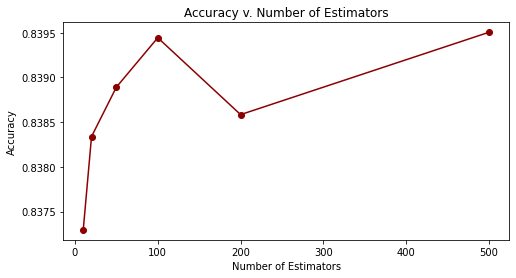

In [41]:
# Initialize an empty list to store the accuracy scores for each number of estimators
results = []
# Define a list of different numbers of estimators to try
n_estimators_list = [10, 20, 50, 100, 200, 500]
# Train a Random Forest model with each number of estimators and evaluate its performance on the validation set
for n_estimators in n_estimators_list:
    # Initialize a Random Forest classifier with the current number of estimators
    randf_clf = RandomForestClassifier(n_estimators=n_estimators, random_state=101)
    # Train the classifier on the training set
    randf_clf.fit(X_train, y_train)
    # Make predictions on the validation set
    y_pred = randf_clf.predict(X_test)
    # Calculate the accuracy score and AUC for the current model
    accuracy = accuracy_score(Y_test,y_pred)

    # Append the accuracy score to the corresponding list
    results.append(accuracy)
print("Accuracy Results for # of estimators:", results)
# Plot the accuracy scores as a function of the number of estimators
plt.figure(figsize=(8,4))
pd.Series(results,n_estimators_list).plot(color = "darkred", marker = "o")
plt.ylabel("Accuracy")
plt.xlabel("Number of Estimators")
plt.title("Accuracy v. Number of Estimators")
#estimator at 100 is best 

In [42]:
randomforestaccuracy = max(results)
print(randomforestaccuracy)

0.8395061728395061


<ipython-input-43-1a0bc7694e40>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randf_clf.fit(X_train, y_train)
<ipython-input-43-1a0bc7694e40>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randf_clf.fit(X_train, y_train)
<ipython-input-43-1a0bc7694e40>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randf_clf.fit(X_train, y_train)
<ipython-input-43-1a0bc7694e40>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randf_clf.fit(X_train, y_train)
<ipython-input-43-1a0bc7694e40>:10: DataConversionWarning: A column-vector y was passed when a 1d ar

AUC results for # of estimators: [0.7446041725866864, 0.7477122221197654, 0.7487924728086832, 0.7493339468198752, 0.7477832623558259, 0.7478476219869061]


Text(0.5, 1.0, 'AUC v. Number of Estimators')

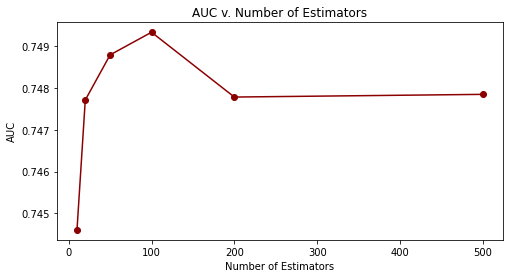

In [43]:
# Initialize an empty list to store the AUC scores for each number of estimators
aucresults = []
# Define a list of different numbers of estimators to try
n_estimators_list = [10, 20, 50, 100, 200, 500]
# Train a Random Forest model with each number of estimators and evaluate its performance on the validation set
for n_estimators in n_estimators_list:
    # Initialize a Random Forest classifier with the current number of estimators
    randf_clf = RandomForestClassifier(n_estimators=n_estimators, random_state=101)
    # Train the classifier on the training set
    randf_clf.fit(X_train, y_train)
    # Make predictions on the validation set
    y_pred = randf_clf.predict(X_test)
    # Calculate the accuracy score and AUC for the current model
  
    auc = roc_auc_score(Y_test, y_pred)

    # Append the accuracy score to the corresponding list
    aucresults.append(auc)
print("AUC results for # of estimators:", aucresults)
# Plot the accuracy scores as a function of the number of estimators
plt.figure(figsize=(8,4))
pd.Series(aucresults,n_estimators_list).plot(color = "darkred", marker = "o")
plt.ylabel("AUC")
plt.xlabel("Number of Estimators")
plt.title("AUC v. Number of Estimators")
#estimator at 100 is best 


In [44]:
randomforestauc = max(aucresults)
print(randomforestauc)

0.7493339468198752


In [45]:
#3. Building a Random Forest Model
#Using Notebook, and the same data source from CA03, train a Random Forest Model. Using 
#similar approach of Section 2 above, plot a graph of Accuracy vs. n_estimator and AUC Vs. 
#n_estimator. Use n_estimator values as [50,100,150,200,250,300,350,400,450,500]. Keep 
#all other hyperparameter values at default.

<ipython-input-46-e6a959fa93d9>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randf_clf.fit(X_train, y_train)
<ipython-input-46-e6a959fa93d9>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randf_clf.fit(X_train, y_train)
<ipython-input-46-e6a959fa93d9>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randf_clf.fit(X_train, y_train)
<ipython-input-46-e6a959fa93d9>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randf_clf.fit(X_train, y_train)
<ipython-input-46-e6a959fa93d9>:10: DataConversionWarning: A column-vector y was passed when a 1d ar

AUC results for # of estimators: [0.7487924728086832, 0.7493339468198752, 0.7486839208188352, 0.7477832623558259, 0.7459350557375733, 0.7473744908783083, 0.7481303715357299, 0.747643879217171, 0.7473744908783083, 0.7478476219869061]


Text(0.5, 1.0, 'AUC v. Number of Estimators')

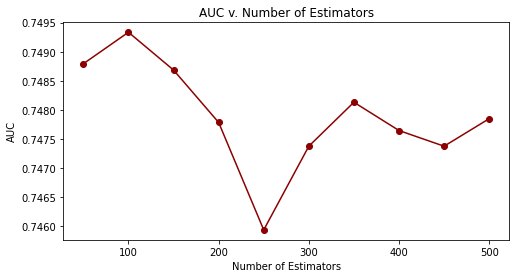

In [46]:
# Initialize an empty list to store the AUC scores for each number of estimators
rfaucresults = []
# Define a list of different numbers of estimators to try
n_estimators_list = [50,100,150,200,250,300,350,400,450,500]
# Train a Random Forest model with each number of estimators and evaluate its performance on the validation set
for n_estimators in n_estimators_list:
    # Initialize a Random Forest classifier with the current number of estimators
    randf_clf = RandomForestClassifier(n_estimators=n_estimators, random_state=101)
    # Train the classifier on the training set
    randf_clf.fit(X_train, y_train)
    # Make predictions on the validation set
    y_pred = randf_clf.predict(X_test)
    # Calculate the accuracy score and AUC for the current model
  
    auc = roc_auc_score(Y_test, y_pred)

    # Append the accuracy score to the corresponding list
    rfaucresults.append(auc)
print("AUC results for # of estimators:", rfaucresults)
# Plot the accuracy scores as a function of the number of estimators
plt.figure(figsize=(8,4))
pd.Series(rfaucresults,n_estimators_list).plot(color = "darkred", marker = "o")
plt.ylabel("AUC")
plt.xlabel("Number of Estimators")
plt.title("AUC v. Number of Estimators")
#estimator at 100 is best 

In [47]:
randomforestauc1 = max(rfaucresults)
print(randomforestauc1)

0.7493339468198752


<ipython-input-48-0cb639fa021f>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randf_clf.fit(X_train, y_train)
<ipython-input-48-0cb639fa021f>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randf_clf.fit(X_train, y_train)
<ipython-input-48-0cb639fa021f>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randf_clf.fit(X_train, y_train)
<ipython-input-48-0cb639fa021f>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randf_clf.fit(X_train, y_train)
<ipython-input-48-0cb639fa021f>:11: DataConversionWarning: A column-vector y was passed when a 1d ar

Accuracy Results for # of estimators: [0.8372950064492353, 0.8383391683557521, 0.8388919599533198, 0.8394447515508875, 0.8385848535102266, 0.8395061728395061]


Text(0.5, 1.0, 'Accuracy v. Number of Estimators')

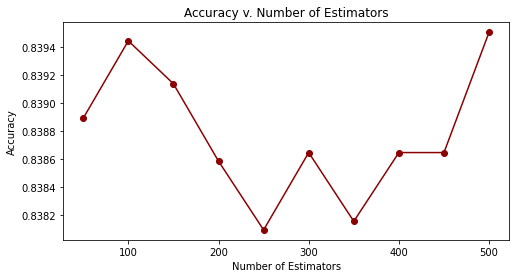

In [48]:
#use this list [50,100,150,200,250,300,350,400,450,500] of n_estimator to graph accuracy v. n_estimator
# Initialize an empty list to store the accuracy scores for each number of estimators
rfaccresults = []
# Define a list of different numbers of estimators to try
n_estimators_list = [50,100,150,200,250,300,350,400,450,500]
# Train a Random Forest model with each number of estimators and evaluate its performance on the validation set
for n_estimators in n_estimators_list:
    # Initialize a Random Forest classifier with the current number of estimators
    randf_clf = RandomForestClassifier(n_estimators=n_estimators, random_state=101)
    # Train the classifier on the training set
    randf_clf.fit(X_train, y_train)
    # Make predictions on the validation set
    y_pred = randf_clf.predict(X_test)
    # Calculate the accuracy score and AUC for the current model
    rfaccuracy = accuracy_score(Y_test,y_pred)

    # Append the accuracy score to the corresponding list
    rfaccresults.append(rfaccuracy)
print("Accuracy Results for # of estimators:", results)
# Plot the accuracy scores as a function of the number of estimators
plt.figure(figsize=(8,4))
pd.Series(rfaccresults,n_estimators_list).plot(color = "darkred", marker = "o")
plt.ylabel("Accuracy")
plt.xlabel("Number of Estimators")
plt.title("Accuracy v. Number of Estimators")
#estimator at 100 is best 

In [49]:
randomaccuracy1 = max(rfaccresults)
print(randomaccuracy1)

0.8395061728395061


In [50]:
#part 5 4. Building AdaBoost, Gradient Boost, and XGB.
#Repeat the process of Section 3 above for AdaBoost, Gradient Boost, and XGB Classifiers.
from sklearn.ensemble import AdaBoostClassifier

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Accuracy Results for # of estimators: [0.8453411952582766, 0.8447884036607088, 0.8447884036607088, 0.8447884036607088, 0.8447884036607088, 0.8447884036607088, 0.8447884036607088, 0.8447884036607088, 0.8447884036607088, 0.8447884036607088]
0.8453411952582766


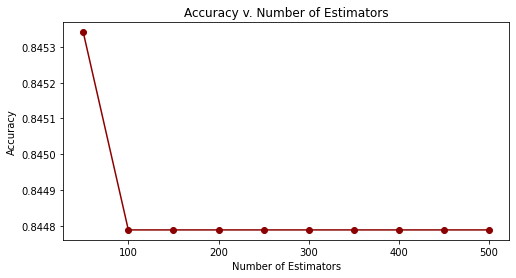

In [51]:
#adaboost
#use this list [50,100,150,200,250,300,350,400,450,500] of n_estimator to graph accuracy v. n_estimator
# Initialize an empty list to store the accuracy scores for each number of estimators
abresults = []
# Define a list of different numbers of estimators to try
n_estimators_list = [50,100,150,200,250,300,350,400,450,500]
# Train a Random Forest model with each number of estimators and evaluate its performance on the validation set
for n_estimators in n_estimators_list:
    # Initialize a Random Forest classifier with the current number of estimators
    ab_clf = AdaBoostClassifier(n_estimators=n_estimators, random_state=101)
    # Train the classifier on the training set
    ab_clf.fit(X_train, y_train)
    # Make predictions on the validation set
    y_pred = ab_clf.predict(X_test)
    # Calculate the accuracy score and AUC for the current model
    abaccuracy = accuracy_score(Y_test,y_pred)

    # Append the accuracy score to the corresponding list
    abresults.append(abaccuracy)
print("Accuracy Results for # of estimators:", abresults)
# Plot the accuracy scores as a function of the number of estimators
plt.figure(figsize=(8,4))
pd.Series(abresults,n_estimators_list).plot(color = "darkred", marker = "o")
plt.ylabel("Accuracy")
plt.xlabel("Number of Estimators")
plt.title("Accuracy v. Number of Estimators")
#estimator at 100 is best 
largest = max(abresults)
print(largest)

In [52]:
adaboostacc = max(abresults)
print(adaboostacc)

0.8453411952582766


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

AUC results for # of estimators: [0.7488838057744263, 0.7460076328264228, 0.7460076328264228, 0.7460076328264228, 0.7460076328264228, 0.7460076328264228, 0.7460076328264228, 0.7460076328264228, 0.7460076328264228, 0.7460076328264228]


Text(0.5, 1.0, 'AUC v. Number of Estimators')

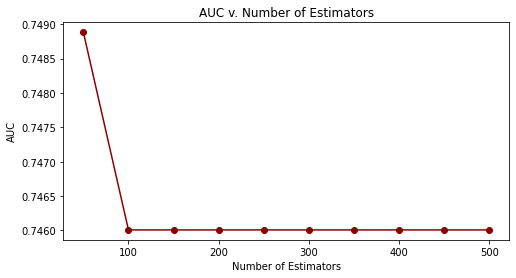

In [53]:
# Initialize an empty list to store the AUC scores for each number of estimators
abaucresults = []
# Define a list of different numbers of estimators to try
n_estimators_list = [50,100,150,200,250,300,350,400,450,500]
# Train a Random Forest model with each number of estimators and evaluate its performance on the validation set
for n_estimators in n_estimators_list:
    # Initialize a Random Forest classifier with the current number of estimators
    ab_clf = AdaBoostClassifier(n_estimators=n_estimators, random_state=101)
    # Train the classifier on the training set
    ab_clf.fit(X_train, y_train)
    # Make predictions on the validation set
    y_pred = ab_clf.predict(X_test)
    # Calculate the accuracy score and AUC for the current model
  
    abauc = roc_auc_score(Y_test, y_pred)

    # Append the accuracy score to the corresponding list
    abaucresults.append(abauc)
print("AUC results for # of estimators:", abaucresults)
# Plot the accuracy scores as a function of the number of estimators
plt.figure(figsize=(8,4))
pd.Series(abaucresults,n_estimators_list).plot(color = "darkred", marker = "o")
plt.ylabel("AUC")
plt.xlabel("Number of Estimators")
plt.title("AUC v. Number of Estimators")
#estimator at 100 is best 

In [54]:
adaboostauc = max(abaucresults)
print(adaboostauc)

0.7488838057744263


In [55]:
#import gradient classifier
from sklearn.ensemble import GradientBoostingClassifier

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

AUC results for # of estimators: [0.8472452552054542, 0.8465696210306493, 0.8459554081444629, 0.8458939868558443, 0.8462625145875561, 0.8461396720103188, 0.8458325655672256, 0.8454026165468952, 0.8453411952582766, 0.8447269823720902]


Text(0.5, 1.0, 'Accuracy v. Number of Estimators in GradientBoosting')

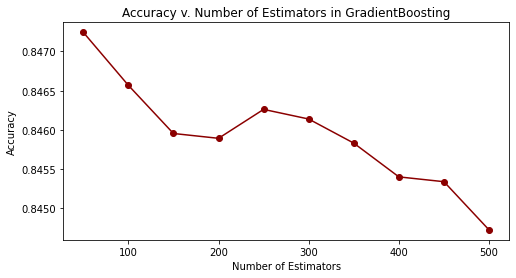

In [56]:
#Gradient Boost
#should it iterate through max-depth also? itrate through learning?
# Initialize an empty list to store the AUC scores for each number of estimators
gradientboostresults = []
# Define a list of different numbers of estimators to try
n_estimators_list = [50,100,150,200,250,300,350,400,450,500]
# Train a Random Forest model with each number of estimators and evaluate its performance on the validation set
for n_estimators in n_estimators_list:
    # Initialize a Random Forest classifier with the current number of estimators
    gb_clf = GradientBoostingClassifier(n_estimators=n_estimators, random_state=101)
    # Train the classifier on the training set
    gb_clf.fit(X_train, y_train)
    # Make predictions on the validation set
    y_pred = gb_clf.predict(X_test)
    # Calculate the accuracy score 
    gradientboostaccuracy = accuracy_score(Y_test,y_pred)

    # Append the accuracy score to the corresponding list
    gradientboostresults.append(gradientboostaccuracy)
print("AUC results for # of estimators:", gradientboostresults)
# Plot the accuracy scores as a function of the number of estimators
plt.figure(figsize=(8,4))
pd.Series(gradientboostresults,n_estimators_list).plot(color = "darkred", marker = "o")
plt.ylabel("Accuracy")
plt.xlabel("Number of Estimators")
plt.title("Accuracy v. Number of Estimators in GradientBoosting")
#estimator at 50 is best 

In [57]:
gradientboostingacc = max(gradientboostresults)
print(gradientboostingacc)

0.8472452552054542


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

AUC results for # of estimators: [0.7462690546222573, 0.7548961620708495, 0.7570981584739869, 0.7585844833069559, 0.758466553378661, 0.7582963390911993, 0.7576463130901593, 0.7577240339312005, 0.7582226015216725, 0.7573715300843639]


Text(0.5, 1.0, 'AUC v. Number of Estimators in GradientBoosting')

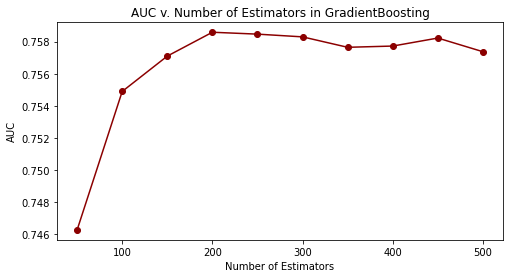

In [60]:
#GradientBoosting AUC 
# Initialize an empty list to store the AUC scores for each number of estimators
gradientboostingaucresults = []
# Define a list of different numbers of estimators to try
n_estimators_list = [50,100,150,200,250,300,350,400,450,500]
# Train a Random Forest model with each number of estimators and evaluate its performance on the validation set
for n_estimators in n_estimators_list:
    # Initialize a Random Forest classifier with the current number of estimators
    gb_clf = GradientBoostingClassifier(n_estimators=n_estimators, random_state=101)
    # Train the classifier on the training set
    gb_clf .fit(X_train, y_train)
    # Make predictions on the validation set
    y_pred =gb_clf.predict(X_test)
    # Calculate the accuracy score and AUC for the current model
  
    gboostauc = roc_auc_score(Y_test, y_pred)

    # Append the accuracy score to the corresponding list
    gradientboostingaucresults.append(gboostauc)
print("AUC results for # of estimators:", gradientboostingaucresults)
# Plot the accuracy scores as a function of the number of estimators
plt.figure(figsize=(8,4))
pd.Series(gradientboostingaucresults,n_estimators_list).plot(color = "darkred", marker = "o")
plt.ylabel("AUC")
plt.xlabel("Number of Estimators")
plt.title("AUC v. Number of Estimators in GradientBoosting")


In [61]:
gradientboostingauc = max(gradientboostingaucresults)
print(gradientboostingauc)

0.7585844833069559


In [62]:
gradientboostinglargest = max(gradientboostingaucresults)
print(gradientboostinglargest)
#0.7585844833069559

0.7585844833069559


In [101]:
import xgboost as xgb
import re

In [72]:
new_names = []
for i, col in enumerate(X_test.columns):
    if col in new_names:
        new_names.append(col + '_' + str(i))
    else:
        new_names.append(col)
X_test.columns = new_names
#This code creates a new list of feature names (new_names) and loops over the original column names. For each column name, it checks if the name is already in the new_names list, and if so, appends a numerical suffix to make it unique. The new list of names is then assigned to the column names of the X dataframe. This will ensure that all feature names are unique and can be used by the XGBClassifier.

In [78]:
new_names = []
for i, col in enumerate(X_train.columns):
    if col in new_names:
        new_names.append(col + '_' + str(i))
    else:
        new_names.append(col)
X_train.columns = new_names
#This code creates a new list of feature names (new_names) and loops over the original column names. For each column name, it checks if the name is already in the new_names list, and if so, appends a numerical suffix to make it unique. The new list of names is then

In [98]:
#XGB #dtrain is a matrix - using the Dtrain data because its in matrix format
#getting value error need to fix
# Rename features to remove brackets
X_train.columns = [re.sub('[\[\]\<\>]', '_', col) for col in X_train.columns]
X_test.columns = [re.sub('[\[\]\<\>]', '_', col) for col in X_test.columns]
y_train.columns = [re.sub('[\[\]\<\>]', '_', col) for col in y_train.columns]
Y_test = [re.sub('[\[\]\<\>]', '_', col) for col in y_train.columns]
xgbresults = []
n_estimators_list = [50,100,150,200,250,300,350,400,450,500]
for n_estimators in n_estimators_list:
  xgb_clf = xgb.XGBClassifier(n_estimators, random_state=101)
  xgb_clf.fit(X_train, y_train)
  y_pred = xgb_clf.predict_proba(X_test)[:,1]

  #calculate AUC
  xgbauc = roc_auc_score(Y_test, y_pred)

  #append score
  xgbresults.append(xgbauc)
#print results  
print("Auc results for # n_estimators:", xgbresults)
plt.figure(figsize=(8,4))
plt.title("AUC v. Number of Estimators UAC")
plt.xlabel("Number of Estimators")
plt.ylabel("AUC")
pd.Series(xgbresults, n_estimators_list).plot(color="darkred",marker="o")

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

In [71]:
print(pd.Series(X_train.columns).duplicated().sum())

1


In [82]:
xgbauc = max(xgbresults)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- capital_gl_bin_ _ 0
- capital_gl_bin_ _ 0_15
Feature names seen at fit time, yet now missing:
- capital_gl_bin_ < 0
- capital_gl_bin_ > 0

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.

AUC results for # of estimators: [0.8472452552054542, 0.8465696210306493, 0.8459554081444629, 0.8458939868558443, 0.8462625145875561, 0.8461396720103188, 0.8458325655672256, 0.8454026165468952, 0.8453411952582766, 0.8447269823720902]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- capital_gl_bin_ _ 0
- capital_gl_bin_ _ 0_15
Feature names seen at fit time, yet now missing:
- capital_gl_bin_ < 0
- capital_gl_bin_ > 0

  warnings.warn(message, FutureWarning)


Text(0.5, 1.0, 'Accuracy v. Number of Estimators in XGB')

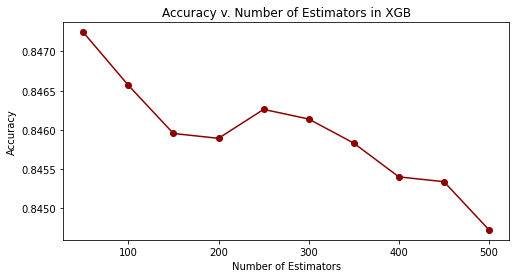

In [81]:
#Xtreme Gradient Boosting - accuracy
#should it iterate through max-depth also? itrate through learning?
# Initialize an empty list to store the AUC scores for each number of estimators
xgbaccresults = []
# Define a list of different numbers of estimators to try
n_estimators_list = [50,100,150,200,250,300,350,400,450,500]
# Train a Random Forest model with each number of estimators and evaluate its performance on the validation set
for n_estimators in n_estimators_list:
    # Initialize a Random Forest classifier with the current number of estimators
    xgb_clf = xgb.XGBClassifier(n_estimators=n_estimators, random_state=101)
    # Train the classifier on the training set
    xgb_clf.fit(X_train, y_train)
    # Make predictions on the validation set
    y_pred = xgb_clf.predict(X_test)
    # Calculate the accuracy score 
    xgbaccuracy = accuracy_score(Y_test,y_pred)

    # Append the accuracy score to the corresponding list
    xgbaccresults.append(xgbaccuracy)
print("AUC results for # of estimators:", gradientboostresults)
# Plot the accuracy scores as a function of the number of estimators
plt.figure(figsize=(8,4))
pd.Series(gradientboostresults,n_estimators_list).plot(color = "darkred", marker = "o")
plt.ylabel("Accuracy")
plt.xlabel("Number of Estimators")
plt.title("Accuracy v. Number of Estimators in XGB")

In [84]:
xgbacc = max(xgbaccresults)
print(xgbacc)

0.8447269823720902


In [ ]:
#5 - compare performance

In [86]:
data1 = {'Random Forest': [randomaccuracy1, adaboostacc],
        'ADABoost':[adaboostacc,adaboostauc],
        'GradientBoosting':[gradientboostingacc,gradientboostingauc],
         'XGBost':[xgbacc,xgbauc]}

perdf1 = pd.DataFrame(data1,index=(['Accuracy','AUC']))

perdf1

,Random Forest,ADABoost,GradientBoosting,XGBost
Accuracy,0.839506,0.845341,0.847245,0.844727
AUC,0.845341,0.748884,0.758584,0.746053
